In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings

# Load the data we are going to work

In [2]:
#Use pd.read_csv to read the csv file
df = pd.read_csv('walmart_sales.csv')

In [3]:
#Drop the first column since it is not necessary in our analysis
df.drop(columns = df.columns[0], inplace = True)

In [4]:
#See the first 5 rows to see if the dataset looks like what we expected
df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Close,1,2,...,90,91,92,93,94,95,96,97,98,99
0,2010-02-05,42.31,2.572,211.096358,8.106,False,24924.50,53.450001,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-02-05,42.31,2.572,211.096358,8.106,False,50605.27,53.450001,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-05,42.31,2.572,211.096358,8.106,False,13740.12,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-05,42.31,2.572,211.096358,8.106,False,39954.04,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-02-05,42.31,2.572,211.096358,8.106,False,32229.38,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(409727, 89)

# Data Visualization

In [6]:
#Plot an histogram of the variables we are interested on

In [7]:
'''I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'''

'I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'

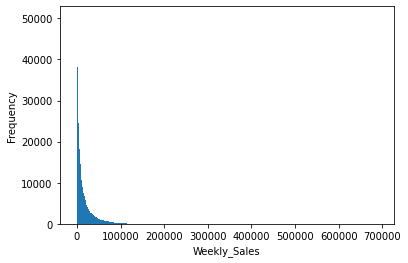

In [8]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

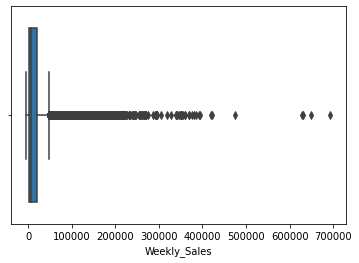

In [9]:
#Plot a boxplot
sns.boxplot(x = 'Weekly_Sales', data = df)

In [10]:
'''From the box plot, we are able to see that there may be some outliers'''

'From the box plot, we are able to see that there may be some outliers'

### Removing outliers 

In [11]:
#Process to remove outliers
mean = df['Weekly_Sales'].mean()
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)

In [12]:
IQR = Q3 - Q1

In [13]:
df = df.loc[df['Weekly_Sales'] >= Q1 - 1.5*IQR]
df = df.loc[df['Weekly_Sales'] <= Q3 + 1.5*IQR]

In [14]:
df.shape

(375188, 89)

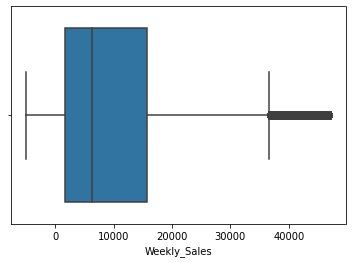

In [15]:
sns.boxplot(x = 'Weekly_Sales', data = df)

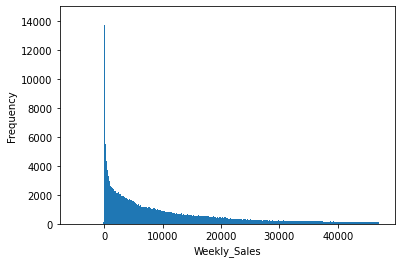

In [16]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [17]:
'''It does not look like the weekly sales follow a normal distribution based on the histogram'''

'It does not look like the weekly sales follow a normal distribution based on the histogram'

In [18]:
df_2 = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales', 'Close']]

In [19]:
#Plot a correlation heat map to see the correlation among all the variables
df_corr = df_2.corr()

In [20]:
df_corr

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Close
Temperature,1.000000,0.143087,0.177008,0.101062,0.001416,0.098519
Fuel_Price,0.143087,1.000000,-0.168826,-0.029669,0.007062,0.469201
CPI,0.177008,-0.168826,1.000000,-0.312462,-0.037607,0.063113
Unemployment,0.101062,-0.029669,-0.312462,1.000000,-0.009346,-0.216900
Weekly_Sales,0.001416,0.007062,-0.037607,-0.009346,1.000000,-0.003274
Close,0.098519,0.469201,0.063113,-0.216900,-0.003274,1.000000


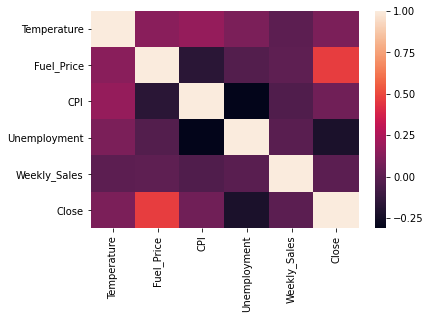

In [21]:
sns.heatmap(df_corr)

In [22]:
'''Looks like the variables that are more correlated are the Fuel_Price and the Close price of the stock
On the other hand, there is no a clear correlation between the sales and any of the variables'''


'Looks like the variables that are more correlated are the Fuel_Price and the Close price of the stock\nOn the other hand, there is no a clear correlation between the sales and any of the variables'

# Hypothesis testing

I will use the Null Hypothesis that departments have influence on the weekly sales

In [23]:
#To use the hypothesis testing, we will use the same model, but with no categorical(dummies) variables
df_no_dummies = pd.read_csv('walmart_sales_statistical.csv', index_col = 0)

In [24]:
#Process to remove outliers since the mean is heavily influenced for the outliers
#Define the 25% and the 75% percentile
Q1 = df_no_dummies['Weekly_Sales'].quantile(0.25)
Q3 = df_no_dummies['Weekly_Sales'].quantile(0.75)

In [25]:
#Define the Interquartile range
IQR = Q3 - Q1

In [26]:
#Remove the outliers by using the Interquartile formula
df_no_dummies = df_no_dummies.loc[df_no_dummies['Weekly_Sales'] >= Q1 - 1.5*IQR]
df_no_dummies = df_no_dummies.loc[df_no_dummies['Weekly_Sales'] <= Q3 + 1.5*IQR]

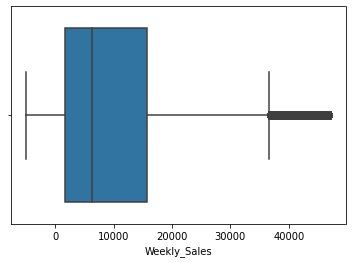

In [27]:
#Plot the boxplot 
sns.boxplot(x = 'Weekly_Sales', data = df_no_dummies)

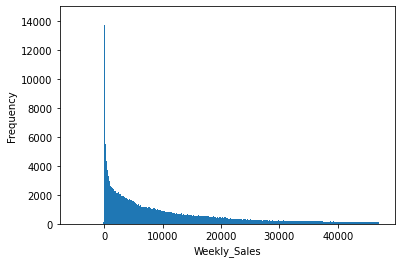

In [28]:
#Plot the Histogram without the outliers
plt.hist(df_no_dummies['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [29]:
#See the department 1 and its distribution
df_no_dummies_dept1 = df_no_dummies.loc[df_no_dummies['Dept'] == 1]

In [30]:
mean1 = df_no_dummies_dept1['Weekly_Sales'].mean()

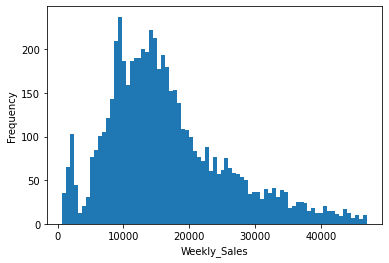

In [31]:
#Plot the histogram for Department 1
n_bins = np.sqrt(len(df_no_dummies_dept1['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df_no_dummies_dept1['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [32]:
#Dpeartment 3 to compare with department 1
df_no_dummies_dept3 = df_no_dummies.loc[df_no_dummies['Dept'] == 3]

In [33]:
mean2 = df_no_dummies_dept3['Weekly_Sales'].mean()

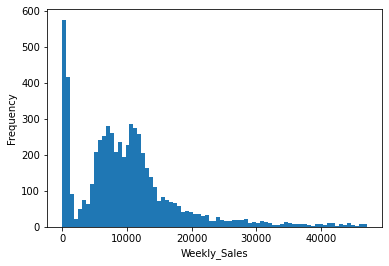

In [34]:
#Plot the histogram for Department 3
plt.hist(df_no_dummies_dept3['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

### Permutation test

In [35]:
#Start the permutation test
df_perm = df_no_dummies_dept3.append(df_no_dummies_dept1)

In [36]:
#Extract the columns we are interested
df_perm = df_perm[['Weekly_Sales', 'Dept']]

In [37]:
#Start the permutation test
df_perm['Permutation'] = np.random.permutation(df_perm['Weekly_Sales'])

In [38]:
#Compare the permutation and the data we got
df_perm.groupby('Dept').describe().T

Dept                           1             3
Weekly_Sales count   6034.000000   6064.000000
             mean   16633.638507  10131.944865
             std     9120.993802   8239.061567
             min      711.110000      2.000000
             25%    10075.602500   5206.482500
             50%    14789.160000   9014.315000
             75%    21173.597500  12875.245000
             max    46999.200000  47057.650000
Permutation  count   6034.000000   6064.000000
             mean   13252.917638  13495.940531
             std     9167.666595   9385.648089
             min        2.280000      2.000000
             25%     7243.482500   7301.390000
             50%    11583.605000  11747.115000
             75%    17214.967500  17575.240000
             max    47057.650000  47055.640000

In [39]:
#Start an empty list to fill the difference between the means
number_tries = 500
difference = []
for i in range(number_tries):
    df_perm[i] = np.random.permutation(df_perm['Weekly_Sales'])
    diff = df_perm.loc[df_perm['Dept'] == 1][i].mean() - df_perm.loc[df_perm['Dept'] == 3][i].mean()
    difference.append(diff)

In [40]:
print('The average of difference of the permutations is', np.mean(difference))

The average of difference of the permutations is -4.864866767785982


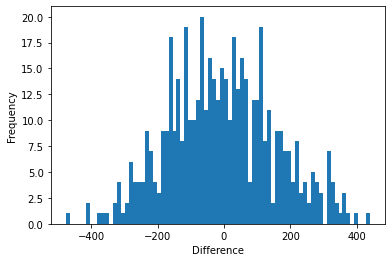

In [41]:
#Plot the difference distribution
plt.hist(difference, bins = n_bins)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [42]:
#Absolute value of the original means of the dataset
abs_difference = abs(mean1 - mean2)

In [43]:
#Calculate our p-value to see the statistical significance
p_value = np.sum(np.mean(difference) >= abs_difference)/number_tries
print('We got a p-value of', p_value)

We got a p-value of 0.0


By looking the data, we had our Null Hypothesis that department does affect the weekly sales on Walmart. However, by running a permutation test, we are rejecting our Null Hypothesis and department does not influence as much as expected on the weekly sales

### Modelling and creation of a model to predict the weekly sales

#### Multiple Linear Regression

#### Model 1

In [44]:
# Create test and train datasets
# Include all columns from data except weekly_sales and department in the explanatory variables X 
X = df_2.drop(columns = 'Weekly_Sales', axis = 1)
y = df[['Weekly_Sales']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
# Create the model
rModel = sm.OLS(y_train, X_train)
# Fit the model
rModel_results = rModel.fit()

In [46]:
# Evaluate the model
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     120.5
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          7.60e-128
Time:                        13:03:23   Log-Likelihood:            -3.0242e+06
No. Observations:              281391   AIC:                         6.048e+06
Df Residuals:                  281385   BIC:                         6.048e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.435e+04    270.920     52.953      0.000    1.38e+04    1.49e+04
Temperature      8.0824      1.204      6.710      0.000       5.722      10.443
Fuel_Price      26.3404     54.588      0.483      0.629     -80.651     133.331
CPI            -13.8964      0.602    -23.070      0.000     -15.077     -12.716
Unemployment  -158.5248     12.388    -12.797      0.000    -182.805    -134.245
Close          -13.7098      3.414     -4.016      0.000     -20.400      -7.019
==============================================================================
Omnibus:                    54727.040   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92928.386
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                       3.982   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
'''As we can see, a linear regression is not a good model to try to predict the weekly sales at walmart because of the 0.02 adjusted R-Squared. Wee need to find another possible model to predict the weekly sales in a store'''

'As we can see, a linear regression is not a good model to try to predict the weekly sales at walmart because of the 0.02 adjusted R-Squared. Wee need to find another possible model to predict the weekly sales in a store'

In [48]:
coeff_results = pd.DataFrame(rModel_results.params)

In [49]:
coeff_results

,0
const,14346.131822
Temperature,8.082358
Fuel_Price,26.340424
CPI,-13.896396
Unemployment,-158.524795
Close,-13.709822


In [50]:
'''Maximum seems to be the temperature and the other ones have negative influence on the weekly sales. The highest negative infuence is the unemployement, something to take into real consideration'''

'Maximum seems to be the temperature and the other ones have negative influence on the weekly sales. The highest negative infuence is the unemployement, something to take into real consideration'

In [51]:
'''Higher temperature is meaning higher expected sales as a point of consideration and for some reason, a decrease in the stock price is having anegative impact on the weekly sales'''

'Higher temperature is meaning higher expected sales as a point of consideration and for some reason, a decrease in the stock price is having anegative impact on the weekly sales'

#### Model 2

In [52]:
#Divide the sales by department
df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Close,1,2,...,90,91,92,93,94,95,96,97,98,99
0,2010-02-05,42.31,2.572,211.096358,8.106,False,24924.50,53.450001,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-05,42.31,2.572,211.096358,8.106,False,13740.12,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-05,42.31,2.572,211.096358,8.106,False,39954.04,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-02-05,42.31,2.572,211.096358,8.106,False,32229.38,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2010-02-05,42.31,2.572,211.096358,8.106,False,5749.03,53.450001,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Model 2 will take into consideration just the department
df_categorical = df.iloc[:,6:].drop(columns = {'Close', '99'})

In [54]:
df_categorical.head()

,Weekly_Sales,1,2,3,4,5,6,7,8,9,...,87,90,91,92,93,94,95,96,97,98
0,24924.50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13740.12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39954.04,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32229.38,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5749.03,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Create test and train datasets
# Include all columns from data except weekly_sales and department in the explanatory variables X 
X = df_categorical.drop(columns = 'Weekly_Sales', axis = 1)
y = df_categorical[['Weekly_Sales']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [56]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)
# Fit the model
rModel2_results = rModel2.fit()

In [57]:
# Evaluate the model
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     3284.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:03:27   Log-Likelihood:            -2.9317e+06
No. Observations:              281391   AIC:                         5.864e+06
Df Residuals:                  281310   BIC:                         5.864e+06
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        417.0312    324.289      1.286      0.198    -218.566    1052.628
1           1.627e+04    346.424     46.951      0.000    1.56e+04    1.69e+04
2           2.514e+04    359.691     69.901      0.000    2.44e+04    2.58e+04
3           9879.4548    345.648     28.582      0.000    9201.995    1.06e+04
4           2.269e+04    347.228     65.351      0.000     2.2e+04    2.34e+04
5           1.707e+04    346.900     49.201      0.000    1.64e+04    1.77e+04
6           4233.9068    346.724     12.211      0.000    3554.337    4913.476
7           1.733e+04    347.375     49.876      0.000    1.66e+04     1.8e+04
8           2.424e+04    348.661     69.509      0.000    2.36e+04    2.49e+04
9           1.657e+04    346.719     47.801      0.000    1.59e+04    1.73e+04
10          1.685e+04    345.807     48.718      0.000    1.62e+04    1.75e+04
11          1.371e+04    345.500     39.669      0.000     1.3e+04    1.44e+04
12          3791.9950    345.293     10.982      0.000    3115.231    4468.759
13          2.471e+04    349.153     70.760      0.000     2.4e+04    2.54e+04
14          1.364e+04    345.447     39.496      0.000     1.3e+04    1.43e+04
16          1.129e+04    346.333     32.603      0.000    1.06e+04     1.2e+04
17          9699.4811    345.223     28.096      0.000    9022.853    1.04e+04
18          4904.0357    351.853     13.938      0.000    4214.414    5593.658
19          1221.8458    356.029      3.432      0.001     524.039    1919.652
20          5125.6091    346.444     14.795      0.000    4446.589    5804.629
21          4488.7941    345.150     13.005      0.000    3812.310    5165.278
22          1.034e+04    348.205     29.696      0.000    9657.706     1.1e+04
23          2.077e+04    349.245     59.464      0.000    2.01e+04    2.15e+04
24          5910.1341    348.947     16.937      0.000    5226.208    6594.060
25          8456.3379    345.495     24.476      0.000    7779.176    9133.499
26          7084.4492    347.663     20.377      0.000    6403.039    7765.860
27          1142.2151    347.788      3.284      0.001     460.560    1823.871
28           191.1950    346.361      0.552      0.581    -487.664     870.054
29          5154.7190    349.214     14.761      0.000    4470.269    5839.169
30          3687.9268    349.671     10.547      0.000    3002.581    4373.273
31          1909.7408    346.361      5.514      0.000    1230.882    2588.600
32          6179.2136    346.699     17.823      0.000    5499.693    6858.734
33          5967.7577    349.282     17.086      0.000    5283.174    6652.341
34          1.478e+04    349.551     42.297      0.000    1.41e+04    1.55e+04
35          2479.9008    349.245      7.101      0.000    1795.390    3164.411
36          1576.3158    349.507      4.510      0.000     891.292    2261.339
37

In [58]:
'''The R-Squared looks better by having the department as the independant variables, but it is not still the best model'''

'The R-Squared looks better by having the department as the independant variables, but it is not still the best model'

In [59]:
# Use our new model to make predictions
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'Predicted')

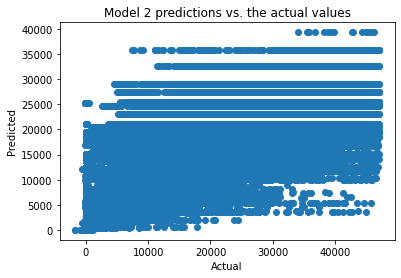

In [60]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Label it nicely
plt.title('Model 2 predictions vs. the actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [61]:
#Look at the max value and the intercept for the department variables
coeff_results = pd.DataFrame(rModel2_results.params)

In [62]:
coeff_results = coeff_results.iloc[1:,:]

In [63]:
coeff_results.max()

0    38938.553983
dtype: float64

In [64]:
pd.set_option('max_rows', None)
coeff_results

,0
1,16265.037965
2,25142.701662
3,9879.454810
4,22691.709758
5,17067.647323
6,4233.906844
7,17325.829687
8,24235.145082
9,16573.429222
10,16847.065568


In [65]:
'''According to the coefficients, the department that has more direct relation with the number of sales is the department number 65'''

'According to the coefficients, the department that has more direct relation with the number of sales is the department number 65'